# Coeficiente de determinación y correlación

#### Ejemplo

En algunos lugares, existe una fuerte asociación entre las concentraciones de dos contaminantes diferentes. El artículo “The Carbon Component of the Los Angeles Aerosol: Fuente: Apportionment and Contributions to the Visibility Budget” (J. Air Pollution Control Fed., 1984) reporta los datos adjuntos sobre concentración de ozono $x(ppm)$ y concentración de carbono secundaria $y(\mu g/m^3)$.

Los datos correspondientes a este reporte se almacenan en dos listas de nombre datos_x y datos_y. 

Identifique si existe una relación entre las variables. Encuentre el modelo de regresión lineal simple mediante la estimación de mínimos cudrados de la verdadera recta de regresión. ¿Que proporción de la variación de concentración de carbono se podría explicar con la relación con la concentración de ozono? ¿Cual es la fuerza de relación entre concentración de ozono y concentración de carbono secundaria?

In [2]:
datos_x = [0.066, 0.088, 0.120, 0.050, 0.162, 0.186, 0.057, 0.100, 0.112, 0.055, 0.154, 0.074, 0.111, 0.140, 0.071, 0.110]
datos_y = [4.6, 11.6, 9.5, 6.3, 13.8, 15.4, 2.5, 11.8, 8.0, 7.0, 20.6, 16.6, 9.2, 17.9, 2.8, 13.0]

Como en cuaquier análisis de regresión se comienza por realizar un diagrama de dispersión para identificar de manera gráfica si existe una realción entre las variables. Esto lo podemos realizar mediante código que se revisó anteriormente.

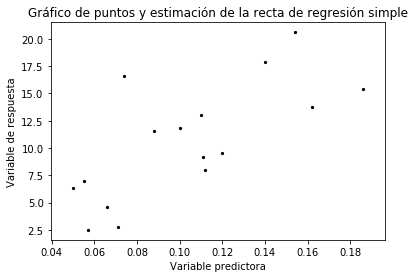

In [3]:
# Se importa librería matplotlib para realizar la gráfica de puntos
import matplotlib.pyplot as plt

plt.scatter(x=datos_x , y=datos_y,  marker='o', c='black', s=5)
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.show()
plt.show()

El resultado anterior sugiere una relación positiva entre ambas variables, por lo que un modelo de regresión linal podría ser útil para explicar el comportameinto de la variable $y$, utilizando la información y la relación existente con la variable $x$.  Utilizando el código desarrollado en laboratorios anteriores para realizar los cálculos necesarios del método de mínimos cuadrados podemos encontrar el valor de $\hat{\beta}_0$ y $\hat{\beta}_1$. A diferencia de otros laboratorios incluiremos el calculo de $\sum_{i=1}^{n}y_i^2$ dentro de la variable sum_yy.

In [1]:
# Importamos la librería numpy para la simplificación de operaciones
import numpy as np

# Generar arrays donde se almacenan los datos contenidos en las listas datos_x y datos_ y
array_x = np.array(datos_x)
array_y = np.array(datos_y)

# Se generan las estadísticas involucradas en la estimación de la ecuación de regresión
n = len(array_x)
sum_x = sum(array_x)
sum_y = sum(array_y)
sum_xy = sum(array_x*array_y)
sum_xx = sum(array_x*array_x)
sum_yy = sum(array_y*array_y)

NameError: name 'datos_x' is not defined

Con estas estadísticas computadas se pueden generar los valores de $S_{xx}$, $S_{xy}$, $\hat{\beta}_{1}$, y $\hat{\beta}_{0}$

In [5]:
# Se obtienen los valores
s_xy = sum_xy-(1/n)*sum_x*sum_y
s_xx = sum_xx-(1/n)*sum_x**2

beta_1 = s_xy / s_xx
beta_0 = (1/n)*sum_y - beta_1*(1/n)*sum_x

# Imprimir los resultados
print("La estimación de los parámetros para el modelo de regresión son: ")
print("beta1: "+str(beta_1))
print("beta0: "+str(beta_0))

La estimación de los parámetros para el modelo de regresión son: 
beta1: 93.37670481266649
beta0: 0.9980110518890175


Estos resultados nos llevan a concluir el siguiente modelo de regresión para los datos dados:
$$ y =  \hat{\beta}_{0} + \hat{\beta}_{1}*x = 0.9980 + 93.3767*x$$

Ahora agregamos esta línea dentro del gráfico de dispersión.

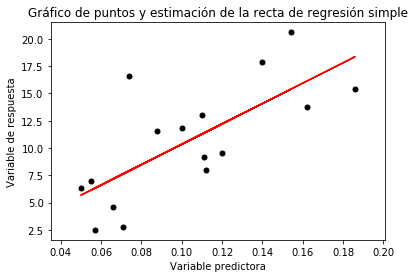

In [6]:
# Se importa librería matplotlib para realizar la gráfica de puntos
import matplotlib.pyplot as plt

plt.scatter(x=datos_x , y=datos_y,  marker='o', c='black', s=25)
plt.plot(array_x, beta_0 + beta_1 * array_x, '-', c='red')
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.show()

¿Que proporción de la variación observada de concentración de carbono se podría explicar con la relación del modelo? Para contestar esta pregunta utilizamos el coeficiente de determinación, que nos indica que cantidad de la varianza total en $y$, es explicada por el modelo de regresión. Recordemos la definición del coeficiente de determinación:

$$ r^2 = \frac{SSR}{SST} = \frac{SST-SSE}{SST} = 1-\frac{SSE}{SST} $$

El cálculo del coeficiente de determinación se puede realizar sin necesidad de obtener los valores pronosticados y los residuos de la siguiente manera:

$$ r^2 = 1-\frac{SSE}{SST} = 
1-\frac{\sum_{i=1}^{n}y_{i}^2-\hat{\beta}_0\sum_{i=1}^{n}y_{i}-\hat{\beta}_1\sum_{i=1}^{n}x_{i}y_{i}}{\sum_{i=1}^{n}(y_{i}-\overline{y})^2} =
1-\frac{\sum_{i=1}^{n}y_{i}^2-\hat{\beta}_0\sum_{i=1}^{n}y_{i}-\hat{\beta}_1\sum_{i=1}^{n}x_{i}y_{i}}{\sum_{i=1}^{n}y_{i}^2-(\sum_{i=1}^{n}{y_{i}})^2}
$$ 

In [7]:
# Relizamos las operaciones para calcular el coeficiente de determinación
sse = sum_yy - beta_0*sum_y - beta_1*sum_xy
sst = sum_yy - (1/n)*sum_y**2

coef_determ = 1-sse/sst

print("El coeficiente de determianción del modelo es: ",coef_determ)

El coeficiente de determianción del modelo es:  0.5119911098274808


Un coeficiente de determinación de 0.512 nos indica que la mitad de la varianza total que existe en la variable $y$, es explicada por el modelo de regresión.

### Coeficiente de correlación muestral

El coeficiente de correlación de la población $\rho$ es un parámetro o característica de la población, exactamente como lo son $\mu_x$, $\mu_y$, $\sigma_x$ y $\sigma_y$, así que se puede utilizar el coeficiente de correlación muestral para hacer varias inferencias sobre $\rho$, a partir de los datos disponibles. En particular, $r$ es una estimación puntual de $\rho$ y el estimador correspondiente es:

$$ r =  \frac{S_{xy}}{\sqrt{S_{xx}}\sqrt{S_{xy}}} $$

La correlación esta definida de la siguiente manera y nos indica la fuerza de relación entre dos variables:

$$ r = \hat{\rho} =  
\frac{S_{xy}}{\sqrt{\sum_{i=1}^{n}(x_{i}-\overline{x})^2}\sqrt{\sum_{i=1}^{n}(y_{i}-\overline{y})^2}} =
\frac{\sum_{i=1}^{n}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\overline{x})^2}\sqrt{\sum_{i=1}^{n}(y_{i}-\overline{y})^2}} $$

El análisis de correlación intenta medir la intensidad de dos variables por medio de un solo de un número.

In [8]:
# Tenemos calculados los terminos necesarios para calcular la correlación
s_xy = sum_xy-(1/n)*sum_x*sum_y
s_xx = sum_xx-(1/n)*sum_x**2
s_yy = sum_yy-(1/n)*sum_y**2

corr = s_xy/((s_xx**(1/2))*(s_yy**(1/2)))

print("El coeficiente de correlación muestral es: ",corr)

El coeficiente de correlación muestral es:  0.7155355405760642


Tanto el coeficiente de determinación como la correlación muestral son estadísticos que nos permiten evaluar de manera general el modelo generado en el análisis de regresión. Aunque los cálculos son similares, $(correlación\hspace{1mm}muestral)^2=coeficiente\hspace{1mm}de\hspace{1mm}determianción$, no debe confundirse la interpretación de cada uno.

#### Es muy importante tener clara la diferencia entre el coeficiente de correlación y el coeficiente de determinación.

#### Coeficiente de determinación $r^2$: mide la proporción de variación de la variable dependiente explicada por la variable independiente

#### Correlación muestral $r$: mide el grado de asociación entre las dos variables.